# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**HUZAIFA, ABU**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [146]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
pd.options.display.max_rows =100

# Libraries for data preparation and model building
import seaborn as sns
import matplotlib.pyplot as plt

# Setting global constants to ensure notebook results are reproducible
# #######PARAMETER_CONSTANT = ###

In [147]:
pd.options.display.max_rows =200
pd.options.display.max_columns =200

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [148]:
raw_train = pd.read_csv('df_train.csv')# load the data
raw_test = pd.read_csv('df_test.csv')

In [149]:
raw_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [150]:
raw_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


looking at data statistics

In [151]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [152]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [153]:
#number of rows and columns in the dataset
n_rows_train = raw_train.shape[0]
n_cols_train = raw_train.shape[1]
print('There are {} rows  and {} columns in the train dataset'.format(n_rows_train,n_cols_train))

There are 8763 rows  and 49 columns in the train dataset


In [154]:
#number of rows and columns in the dataset
n_rows_test = raw_test.shape[0]
n_cols_test = raw_test.shape[1]
print('There are {} rows  and {} columns in the test dataset'.format(n_rows_test,n_cols_test)) 

There are 2920 rows  and 48 columns in the test dataset


In [155]:
(raw_train.isnull().sum()/raw_train.shape[0]*100).sort_values(ascending=False)

Valencia_pressure       23.599224
Unnamed: 0               0.000000
Madrid_weather_id        0.000000
Bilbao_pressure          0.000000
Seville_weather_id       0.000000
Seville_temp_max         0.000000
Madrid_pressure          0.000000
Valencia_temp_max        0.000000
Valencia_temp            0.000000
Bilbao_weather_id        0.000000
Seville_temp             0.000000
Valencia_humidity        0.000000
Valencia_temp_min        0.000000
Barcelona_temp_max       0.000000
Madrid_temp_max          0.000000
Barcelona_temp           0.000000
Bilbao_temp_min          0.000000
Bilbao_temp              0.000000
Barcelona_temp_min       0.000000
Bilbao_temp_max          0.000000
Seville_temp_min         0.000000
Madrid_temp              0.000000
Madrid_temp_min          0.000000
Barcelona_weather_id     0.000000
Valencia_snow_3h         0.000000
time                     0.000000
Barcelona_rain_3h        0.000000
Madrid_wind_speed        0.000000
Valencia_wind_deg        0.000000
Bilbao_rain_1h

In [156]:
(raw_test.isnull().sum()/raw_test.shape[0]*100).sort_values(ascending=False)

Valencia_pressure       15.547945
Unnamed: 0               0.000000
time                     0.000000
Barcelona_weather_id     0.000000
Bilbao_pressure          0.000000
Seville_weather_id       0.000000
Seville_temp_max         0.000000
Madrid_pressure          0.000000
Valencia_temp_max        0.000000
Valencia_temp            0.000000
Bilbao_weather_id        0.000000
Seville_temp             0.000000
Valencia_humidity        0.000000
Valencia_temp_min        0.000000
Barcelona_temp_max       0.000000
Madrid_temp_max          0.000000
Barcelona_temp           0.000000
Bilbao_temp_min          0.000000
Bilbao_temp              0.000000
Barcelona_temp_min       0.000000
Bilbao_temp_max          0.000000
Seville_temp_min         0.000000
Madrid_temp              0.000000
Madrid_weather_id        0.000000
Valencia_snow_3h         0.000000
Barcelona_rain_3h        0.000000
Bilbao_wind_deg          0.000000
Madrid_wind_speed        0.000000
Valencia_wind_deg        0.000000
Bilbao_rain_1h

In [157]:
#number of unique values in each column
for x in raw_train:
    print('{} : {}'.format(x,raw_train[x].nunique()))

Unnamed: 0 : 8763
time : 8763
Madrid_wind_speed : 38
Valencia_wind_deg : 10
Bilbao_rain_1h : 20
Valencia_wind_speed : 58
Seville_humidity : 274
Madrid_humidity : 280
Bilbao_clouds_all : 277
Bilbao_wind_speed : 39
Seville_clouds_all : 246
Bilbao_wind_deg : 1042
Barcelona_wind_speed : 39
Barcelona_wind_deg : 974
Madrid_clouds_all : 250
Seville_wind_speed : 38
Barcelona_rain_1h : 31
Seville_pressure : 25
Seville_rain_1h : 17
Bilbao_snow_3h : 83
Barcelona_pressure : 189
Seville_rain_3h : 50
Madrid_rain_1h : 19
Barcelona_rain_3h : 77
Valencia_snow_3h : 6
Madrid_weather_id : 289
Barcelona_weather_id : 269
Bilbao_pressure : 205
Seville_weather_id : 301
Valencia_pressure : 143
Seville_temp_max : 3294
Madrid_pressure : 298
Valencia_temp_max : 3387
Valencia_temp : 4531
Bilbao_weather_id : 356
Seville_temp : 6702
Valencia_humidity : 260
Valencia_temp_min : 3458
Barcelona_temp_max : 2648
Madrid_temp_max : 3606
Barcelona_temp : 4233
Bilbao_temp_min : 3542
Bilbao_temp : 6676
Barcelona_temp_min : 257

In [158]:
#numeric columns and categorical columns
numeric_cols = raw_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = raw_train.select_dtypes(include='object').columns.tolist()

#removing the unnamed column,id_columns and the shortfall column
train_list = ['Barcelona_weather_id','Bilbao_weather_id','Madrid_weather_id','Seville_weather_id','Unnamed: 0', 'load_shortfall_3h']
for element in train_list:
    numeric_cols.remove(element)
numeric_cols.sort()



In [159]:
#numeric columns and categorical columns for the test data
test_numeric_cols = raw_test.select_dtypes(include=['int64','float64']).columns.tolist()
test_categorical_cols = raw_test.select_dtypes(include='object').columns.tolist()

#removing the unnamed column,id_columns and the shortfall column
test_list = ['Barcelona_weather_id','Bilbao_weather_id','Madrid_weather_id','Seville_weather_id','Unnamed: 0']
for element in test_list:
    test_numeric_cols.remove(element)
test_numeric_cols.sort()

In [160]:
print(numeric_cols)


['Barcelona_pressure', 'Barcelona_rain_1h', 'Barcelona_rain_3h', 'Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min', 'Barcelona_wind_deg', 'Barcelona_wind_speed', 'Bilbao_clouds_all', 'Bilbao_pressure', 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min', 'Bilbao_wind_deg', 'Bilbao_wind_speed', 'Madrid_clouds_all', 'Madrid_humidity', 'Madrid_pressure', 'Madrid_rain_1h', 'Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min', 'Madrid_wind_speed', 'Seville_clouds_all', 'Seville_humidity', 'Seville_rain_1h', 'Seville_rain_3h', 'Seville_temp', 'Seville_temp_max', 'Seville_temp_min', 'Seville_wind_speed', 'Valencia_humidity', 'Valencia_pressure', 'Valencia_snow_3h', 'Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_wind_speed']


In [161]:
print(test_numeric_cols)

['Barcelona_pressure', 'Barcelona_rain_1h', 'Barcelona_rain_3h', 'Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min', 'Barcelona_wind_deg', 'Barcelona_wind_speed', 'Bilbao_clouds_all', 'Bilbao_pressure', 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min', 'Bilbao_wind_deg', 'Bilbao_wind_speed', 'Madrid_clouds_all', 'Madrid_humidity', 'Madrid_pressure', 'Madrid_rain_1h', 'Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min', 'Madrid_wind_speed', 'Seville_clouds_all', 'Seville_humidity', 'Seville_rain_1h', 'Seville_rain_3h', 'Seville_temp', 'Seville_temp_max', 'Seville_temp_min', 'Seville_wind_speed', 'Valencia_humidity', 'Valencia_pressure', 'Valencia_snow_3h', 'Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_wind_speed']


In [162]:
print(categorical_cols)

['time', 'Valencia_wind_deg', 'Seville_pressure']


In [163]:
print(test_categorical_cols)

['time', 'Valencia_wind_deg', 'Seville_pressure']


In [164]:
raw_train[numeric_cols].describe()

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed
count,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,1.377965e+03,0.128906,0.000439,289.855459,291.157644,288.447422,190.544848,2.870497,43.469132,1017.739549,0.135753,0.031912,286.422929,287.966027,285.017973,158.957511,1.850356,19.473392,57.414717,1010.316920,0.037818,288.419439,289.540309,287.202203,2.425729,13.714748,62.658793,0.039439,0.000243,293.978903,297.479527,291.633356,2.425045,65.247727,1012.051407,0.000205,290.592152,291.337233,289.867648,2.586272
std,1.407314e+04,0.634730,0.003994,6.528111,7.273538,6.102593,89.077337,1.792197,32.551044,10.046124,0.374901,0.557264,6.818682,7.105590,6.705672,102.056299,1.695888,28.053660,24.335396,22.198555,0.152639,9.346796,9.752047,9.206237,1.850371,24.272482,22.621226,0.175857,0.003660,7.920986,8.875812,8.178220,1.672895,19.262322,9.506214,0.011866,7.162274,7.565692,6.907402,2.411190
min,6.706667e+02,0.000000,0.000000,270.816667,272.150000,269.483333,0.000000,0.000000,0.000000,971.333333,0.000000,0.000000,267.483333,269.063000,264.483333,0.000000,0.000000,0.000000,6.333333,927.666667,0.000000,264.983333,264.983333,264.983333,0.000000,0.000000,8.333333,0.000000,0.000000,272.063000,272.063000,270.150000,0.000000,10.333333,972.666667,0.000000,269.888000,269.888000,269.888000,0.000000
25%,1.014000e+03,0.000000,0.000000,284.973443,285.483333,284.150000,118.166667,1.666667,10.000000,1013.000000,0.000000,0.000000,281.374167,282.836776,280.085167,73.333333,0.666667,0.000000,36.333333,1012.333333,0.000000,281.404281,282.150000,280.299167,1.000000,0.000000,44.333333,0.000000,0.000000,288.282917,291.312750,285.816667,1.000000,51.333333,1010.333333,0.000000,285.150000,285.550167,284.783333,1.000000
50%,1.018000e+03,0.000000,0.000000,289.416667,290.150000,288.150000,200.000000,2.666667,45.000000,1019.000000,0.000000,0.000000,286.158333,287.630000,284.816667,147.000000,1.000000,0.000000,58.000000,1017.333333,0.000000,287.053333,288.116177,286.083333,2.000000,0.000000,65.666667,0.000000,0.000000,293.323333,297.101667,290.816667,2.000000,67.000000,1015.000000,0.000000,290.176667,291.037000,289.550000,1.666667
75%,1.022000e+03,0.000000,0.000000,294.909000,296.855000,292.966667,260.000000,4.000000,75.000000,1024.000000,0.100000,0.000000,291.034167,292.483333,289.816667,234.000000,2.666667,33.333333,78.666667,1022.000000,0.000000,295.154667,296.816667,293.884500,3.333333,20.000000,82.000000,0.000000,0.000000,299.620333,304.150000,297.150000,3.333333,81.333333,1018.000000,0.000000,296.056667,297.248333,294.820000,3.666667
max,1.001411e+06,12.000000,0.093000,307.316667,314.076667,304.816667,360.000000,12.666667,100.000000,1042.000000,3.000000,21.300000,310.710000,317.966667,309.816667,359.333333,12.666667,100.000000,100.000000,1038.000000,3.000000,313.133333,314.483333,310.383333,13.000000,97.333333,100.000000,3.000000,0.093333,314.976667,320.483333,314.816667,11.666667,100.000000,1021.666667,0.791667,310.

In [165]:
raw_test[test_numeric_cols].describe()

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.0,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2466.000000,2920.0,2920.000000,2920.000000,2920.000000,2920.000000
mean,1015.317123,0.047397,0.000006,289.911289,290.695462,289.124971,178.979452,2.518094,43.355422,1016.709132,0.067517,0.0,286.522375,288.483641,284.920684,162.643836,2.283562,24.255822,62.644463,1016.240411,0.059863,287.869763,288.888393,286.618130,2.457820,15.477283,67.123516,0.046164,0.000001,290.746255,291.589360,290.152431,2.657192,64.623916,1013.148351,0.0,291.377796,291.439216,291.317184,3.012785
std,7.021445,0.162474,0.000217,7.119411,7.113599,7.168049,86.976503,1.625507,30.486298,8.773784,0.153381,0.0,6.492355,6.221324,6.803424,97.749873,1.654787,29.430257,24.138393,9.624074,0.193218,8.977511,9.089699,8.733163,1.774838,25.289197,20.611292,0.193432,0.000074,7.738131,7.521748,7.906915,1.788870,18.355766,6.528997,0.0,7.113243,7.055448,7.176955,1.996340
min,988.333333,0.000000,0.000000,272.650000,273.816667,271.483333,0.000000,0.000000,0.000000,975.000000,0.000000,0.0,268.120000,270.138667,266.483333,0.000000,0.000000,0.000000,8.000000,943.000000,0.000000,268.713333,269.816667,267.816667,0.000000,0.000000,11.666667,0.000000,0.000000,272.350000,273.816667,271.150000,0.000000,13.000000,973.000000,0.0,273.816667,273.816667,273.816667,0.000000
25%,1012.000000,0.000000,0.000000,284.307500,284.816667,283.483333,113.333333,1.333333,13.333333,1013.333333,0.000000,0.0,281.778333,284.150000,280.150000,86.666667,1.000000,0.000000,43.000000,1013.666667,0.000000,280.816667,281.483333,279.816667,1.333333,0.000000,52.000000,0.000000,0.000000,285.356667,286.150000,284.483333,1.333333,52.000000,1010.666667,0.0,285.816667,286.150000,285.816667,1.666667
50%,1016.000000,0.000000,0.000000,289.483333,290.150000,288.816667,176.666667,2.000000,45.000000,1017.666667,0.000000,0.0,286.265000,288.483333,284.483333,140.000000,1.666667,11.333333,63.000000,1017.333333,0.000000,286.396667,287.483333,285.483333,2.000000,0.000000,70.333333,0.000000,0.000000,289.540000,290.483333,289.150000,2.333333,65.000000,1014.666667,0.0,291.150000,291.150000,291.150000,2.333333
75%,1019.333333,0.000000,0.000000,295.816667,296.483333,295.150000,253.333333,3.666667,75.000000,1022.000000,0.000000,0.0,291.119167,292.816667,289.816667,233.333333,3.333333,40.000000,84.000000,1021.333333,0.000000,294.452500,295.483333,293.150000,3.333333,20.000000,85.000000,0.000000,0.000000,295.674167,296.483333,295.150000,3.666667,79.333333,1017.666667,0.0,297.150000,297.150000,297.150000,4.000000
max,1037.000000,2.300000,0.009667,308.150000,309.483333,306.816667,343.333333,12.666667,97.333333,1040.000000,1.600000,0.0,308.966667,310.816667,307.483333,360.000000,10.666667,92.000000,100.000000,1036.000000,3.000000,312.223333,313.483333,310.150000,13.333333,93.333333,100.000000,2.300000,0.004000,314.816667,315.150000,314.483333,12.666667,100.000000,1021.666667,0.0,310.150000,310.150000,310.150000,14.333333


In [166]:
raw_train[categorical_cols].nunique()

time                 8763
Valencia_wind_deg      10
Seville_pressure       25
dtype: int64

In [167]:
raw_test[test_categorical_cols].nunique()

time                 2920
Valencia_wind_deg      10
Seville_pressure       25
dtype: int64

In [168]:
# plot relevant feature interactions



<AxesSubplot:>

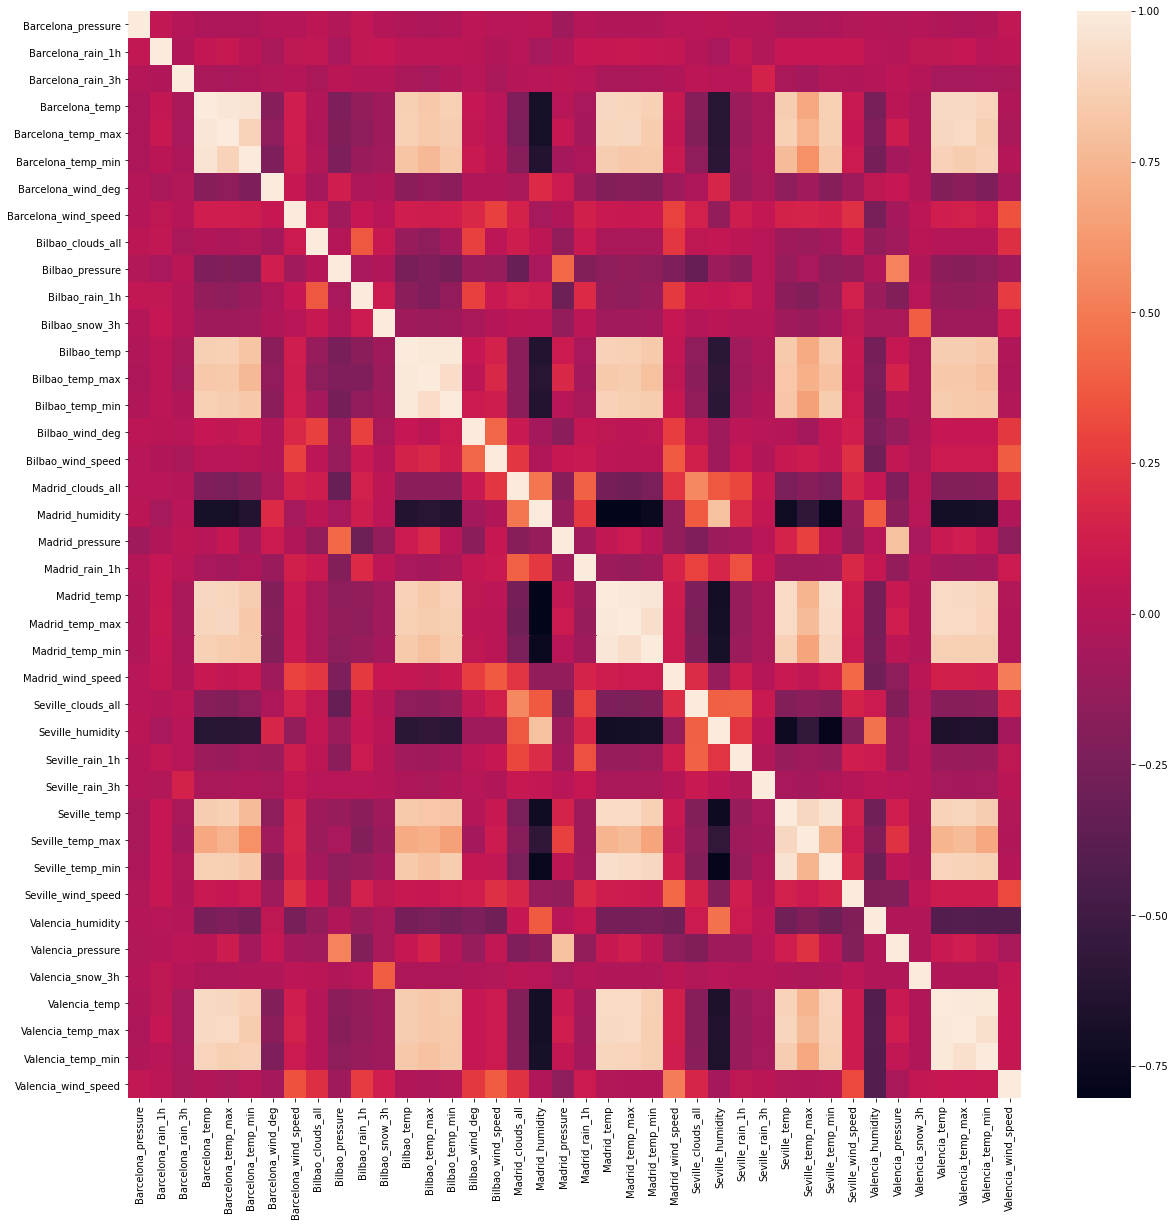

In [169]:
# evaluate correlation
plt.figure(figsize=(20,20))
sns.heatmap(raw_train[numeric_cols].corr())

In [170]:
raw_train[numeric_cols].corr()

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed
Barcelona_pressure,1.000000,0.053550,-0.002796,-0.033221,-0.034412,-0.029612,-0.001079,0.001280,0.037506,-0.014092,0.052458,-0.001539,-0.027410,-0.031854,-0.022514,0.034220,0.009572,0.010833,0.025198,-0.091181,-0.003937,-0.017886,-0.015984,-0.017819,0.011134,0.020264,0.021599,0.003875,-0.001685,-0.041542,-0.047179,-0.032889,-0.008853,-0.003012,-0.007790,-0.000473,-0.028260,-0.029292,-0.026596,0.050282
Barcelona_rain_1h,0.053550,1.000000,-0.020084,0.060384,0.083288,0.023582,-0.037854,0.042136,0.052913,-0.055521,0.052558,0.067461,0.034889,0.032362,0.031765,0.026187,-0.026640,0.008570,-0.061265,-0.016906,0.065321,0.075013,0.079558,0.070146,0.062758,0.003590,-0.051022,0.050899,-0.012500,0.069337,0.064457,0.065312,0.074540,0.009027,-0.001837,0.042576,0.045358,0.068789,0.015905,0.031804
Barcelona_rain_3h,-0.002796,-0.020084,1.000000,-0.042970,-0.051365,-0.029398,-0.011875,-0.001722,-0.041013,0.025215,-0.001412,0.002985,-0.043223,-0.059089,-0.027060,0.007202,-0.038246,-0.000355,0.017797,0.036706,0.018953,-0.039565,-0.046967,-0.029094,-0.014644,0.029194,0.015555,0.007454,0.145740,-0.039126,-0.070069,-0.012016,-0.019804,0.002920,0.030491,-0.001905,-0.058942,-0.061068,-0.055676,-0.037553
Barcelona_temp,-0.033221,0.060384,-0.042970,1.000000,0.974480,0.964089,-0.189016,0.116240,-0.023171,-0.229760,-0.138901,-0.086561,0.865705,0.831470,0.867434,0.068701,0.018967,-0.223940,-0.684867,0.010542,-0.054825,0.903143,0.900428,0.868222,0.080133,-0.186463,-0.617797,-0.098982,-0.041804,0.852651,0.693193,0.873170,0.085395,-0.247168,0.026211,-0.029135,0.914601,0.912094,0.892024,-0.021456
Barcelona_temp_max,-0.034412,0.083288,-0.051365,0.974480,1.000000,0.885911,-0.151302,0.114497,-0.034040,-0.217623,-0.157326,-0.087943,0.867268,0.844563,0.854620,0.049775,0.011151,-0.242409,-0.691803,0.072290,-0.072734,0.896766,0.906248,0.847888,0.061854,-0.205060,-0.606770,-0.110305,-0.049273,0.866389,0.738489,0.862597,0.068902,-0.221430,0.099545,-0.029249,0.901400,0.918256,0.860510,-0.040998
Barcelona_temp_min,-0.029612,0.023582,-0.029398,0.964089,0.885911,1.000000,-0.226583,0.109268,-0.010804,-0.230942,-0.106593,-0.079382,0.810785,0.764031,0.831224,0.086482,0.023711,-0.188578,-0.636777,-0.068083,-0.028900,0.853881,0.836680,0.838985,0.089992,-0.153412,-0.595065,-0.078631,-0.029569,0.779252,0.586923,0.831689,0.097407,-0.266820,-0.067132,-0.027172,0.874447,0.845057,0.879687,0.001413
Barcelona_wind_deg,-0.001079,-0.037854,-0.011875,-0.189016,-0.151302,-0.226583,1.000000,0.076376,-0.065120,0.123565,-0.030723,-0.023039,-0.164656,-0.147388,-0.182302,-0.015481,-0.018225,-0.041083,0.183725,0.093900,-0.112801,-0.211319,-0.193487,-0.211010,-0.095380,-0.031373,0.164064,-0.101449,-0.043800,-0.159882,-0.083393,-0.195212,-0.098837,0.045277,0.067974,-0.021024,-0.201419,-0.170304,-0.228330,-0.066071
Barcelona_wind_speed,0.001280,0.042136,-0.001722,0.116240,0.114497,0.109268,0.076376,1.000000,0.094019,-0.083399,0.069997,0.015752,0.120361,0.109692,0.123403,0.177393,0.275317,0.147652,-0.058518,-0.020364,0.130751,0.089365,0.084209,0.084679,0.294640,0.136591,-0.138625,0.105892,0.058662,0.147628,0.152852,0.130367,0.212193,-0.249610,-0.076290,0.030336,0.121330,0.138254,0.097663,0.347966
Bilbao_clouds_all,0.037506,0.052913,-0.041013,-0.023171,-0.034040,-0.010804,-0.065120,0.094019,1.000000,0.000377,0.370733,0.080180,-0.114118,-0.

In [171]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

From the EDA stage, we realised, Valencia_pressure is the only column with missing data. With 23% of the entire missing,the median will be used to replace missing values

In [172]:
# remove missing values/ features
raw_train['Valencia_pressure'].describe()

count    6695.000000
mean     1012.051407
std         9.506214
min       972.666667
25%      1010.333333
50%      1015.000000
75%      1018.000000
max      1021.666667
Name: Valencia_pressure, dtype: float64

In [173]:
raw_test['Valencia_pressure'].describe()

count    2466.000000
mean     1013.148351
std         6.528997
min       973.000000
25%      1010.666667
50%      1014.666667
75%      1017.666667
max      1021.666667
Name: Valencia_pressure, dtype: float64

Skewness value for Valencia Pressure:  -1.7051619012336132


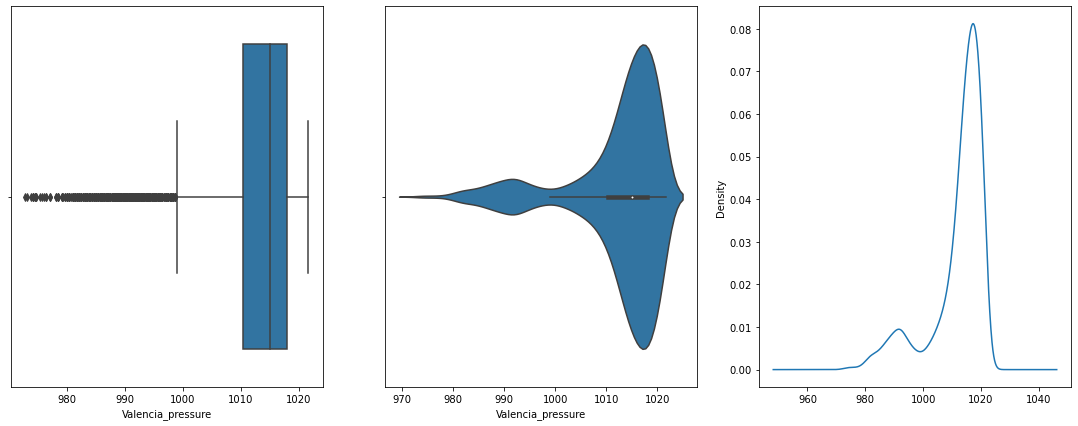

In [174]:
fig,axes = plt.subplots(1,3,sharex=False,figsize=(19,7))
sns.boxplot(x= raw_train['Valencia_pressure'],ax=axes[0]);
sns.violinplot(x=raw_train['Valencia_pressure'],ax=axes[1]);
axes[2]=raw_train['Valencia_pressure'].plot(kind='density')
print('Skewness value for Valencia Pressure: ',raw_train['Valencia_pressure'].skew())

As we can see from the skewness value,density,violin and boxplot, the Valencia_pressure is highly skewed,also the mean value is close to the median vlaue,therefore the median will be used to replace missing values.

Skewness value for Valencia Pressure:  -1.779107852696267


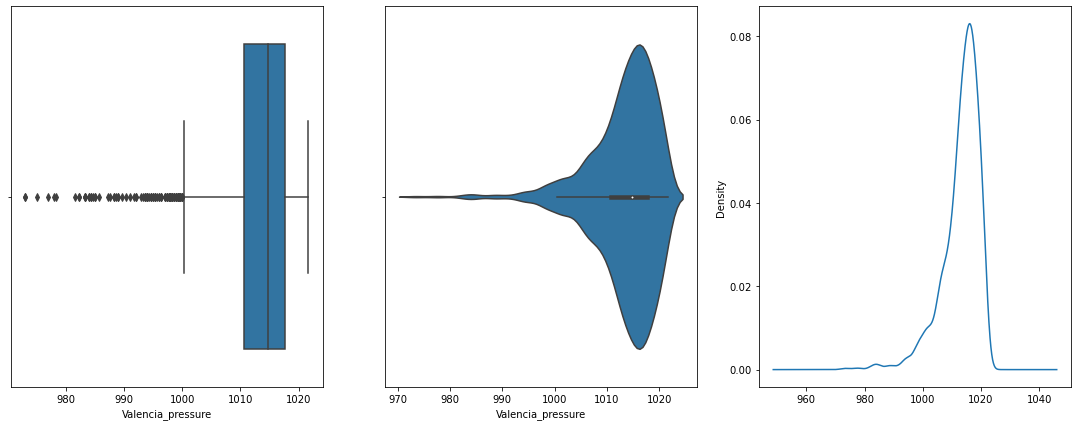

In [175]:
fig,axes = plt.subplots(1,3,sharex=False,figsize=(19,7))
sns.boxplot(x= raw_test['Valencia_pressure'],ax=axes[0]);
sns.violinplot(x=raw_test['Valencia_pressure'],ax=axes[1]);
axes[2]=raw_test['Valencia_pressure'].plot(kind='density')
print('Skewness value for Valencia Pressure: ',raw_test['Valencia_pressure'].skew())


In [176]:
# create new features
mean_valencia_pressure = raw_train['Valencia_pressure'].median()
Inputed_Valencia_pressure= raw_train['Valencia_pressure'].fillna(value=mean_valencia_pressure)

In [177]:
# create new features
test_mean_valencia_pressure = raw_train['Valencia_pressure'].median()
test_Inputed_Valencia_pressure= raw_train['Valencia_pressure'].fillna(value=test_mean_valencia_pressure)

In [178]:
Inputed_Valencia_pressure.describe()

count    8763.000000
mean     1012.747252
std         8.402812
min       972.666667
25%      1012.666667
50%      1015.000000
75%      1017.333333
max      1021.666667
Name: Valencia_pressure, dtype: float64

In [179]:
test_Inputed_Valencia_pressure.describe()

count    8763.000000
mean     1012.747252
std         8.402812
min       972.666667
25%      1012.666667
50%      1015.000000
75%      1017.333333
max      1021.666667
Name: Valencia_pressure, dtype: float64

Skewness value for Valencia Pressure:  -1.7051619012336132


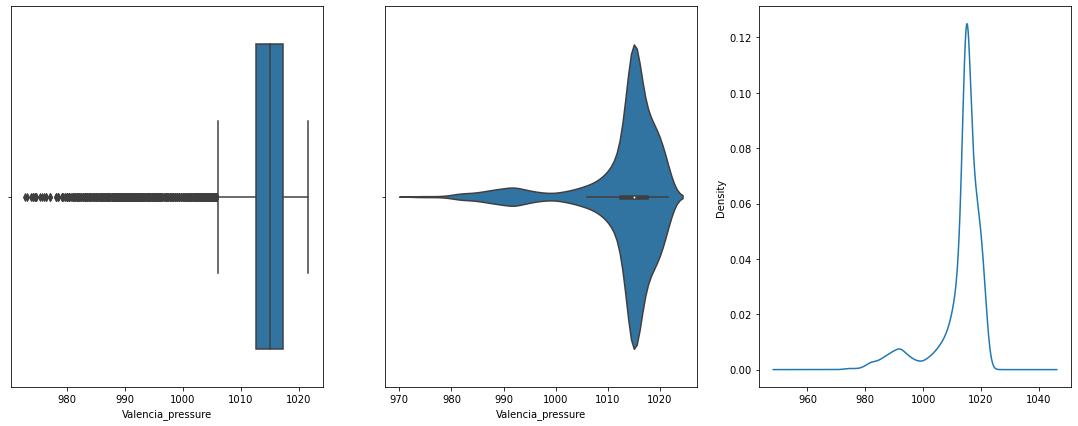

In [180]:
fig,axes = plt.subplots(1,3,sharex=False,figsize=(19,7))
sns.boxplot(x= Inputed_Valencia_pressure,ax=axes[0]);
sns.violinplot(x=Inputed_Valencia_pressure,ax=axes[1]);
axes[2]=Inputed_Valencia_pressure.plot(kind='density')
print('Skewness value for Valencia Pressure: ',raw_train['Valencia_pressure'].skew())

Skewness value for Valencia Pressure:  -2.1249644414622035


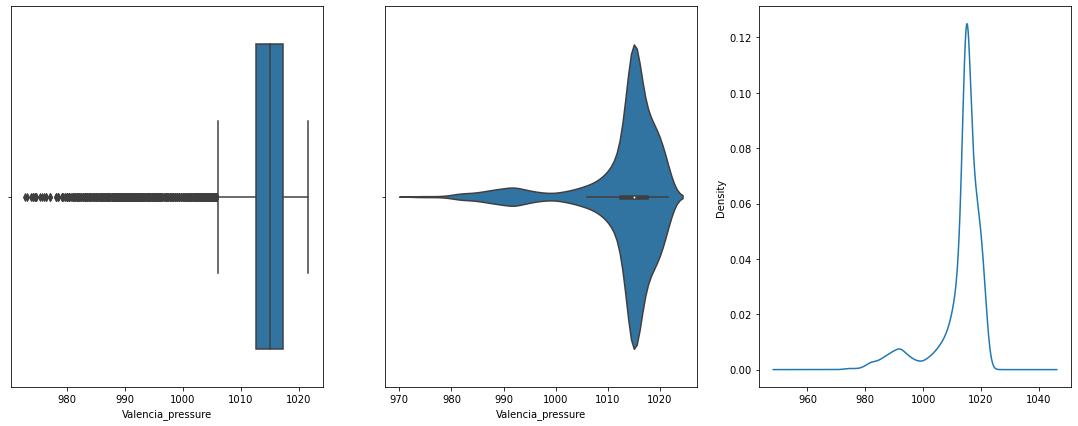

In [181]:
fig,axes = plt.subplots(1,3,sharex=False,figsize=(19,7))
sns.boxplot(x= test_Inputed_Valencia_pressure,ax=axes[0]);
sns.violinplot(x=test_Inputed_Valencia_pressure,ax=axes[1]);
axes[2]=test_Inputed_Valencia_pressure.plot(kind='density')
print('Skewness value for Valencia Pressure: ',test_Inputed_Valencia_pressure.skew())


0

In [183]:
raw_train[categorical_cols[1:]]

,Valencia_wind_deg,Seville_pressure
0,level_5,sp25
1,level_10,sp25
2,level_9,sp25
3,level_8,sp25
4,level_7,sp25
...,...,...
8758,level_6,sp23
8759,level_6,sp23
8760,level_9,sp22
8761,level_8,sp23


In [186]:
print(numeric_cols)

['Barcelona_pressure', 'Barcelona_rain_1h', 'Barcelona_rain_3h', 'Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min', 'Barcelona_wind_deg', 'Barcelona_wind_speed', 'Bilbao_clouds_all', 'Bilbao_pressure', 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min', 'Bilbao_wind_deg', 'Bilbao_wind_speed', 'Madrid_clouds_all', 'Madrid_humidity', 'Madrid_pressure', 'Madrid_rain_1h', 'Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min', 'Madrid_wind_speed', 'Seville_clouds_all', 'Seville_humidity', 'Seville_rain_1h', 'Seville_rain_3h', 'Seville_temp', 'Seville_temp_max', 'Seville_temp_min', 'Seville_wind_speed', 'Valencia_humidity', 'Valencia_pressure', 'Valencia_snow_3h', 'Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_wind_speed']


In [187]:
numeric_cols.remove('Valencia_pressure')
print(numeric_cols)


['Barcelona_pressure', 'Barcelona_rain_1h', 'Barcelona_rain_3h', 'Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min', 'Barcelona_wind_deg', 'Barcelona_wind_speed', 'Bilbao_clouds_all', 'Bilbao_pressure', 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min', 'Bilbao_wind_deg', 'Bilbao_wind_speed', 'Madrid_clouds_all', 'Madrid_humidity', 'Madrid_pressure', 'Madrid_rain_1h', 'Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min', 'Madrid_wind_speed', 'Seville_clouds_all', 'Seville_humidity', 'Seville_rain_1h', 'Seville_rain_3h', 'Seville_temp', 'Seville_temp_max', 'Seville_temp_min', 'Seville_wind_speed', 'Valencia_humidity', 'Valencia_snow_3h', 'Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_wind_speed']


In [195]:
test_numeric_cols.remove('Valencia_pressure')
print(numeric_cols)

None
['Barcelona_pressure', 'Barcelona_rain_1h', 'Barcelona_rain_3h', 'Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min', 'Barcelona_wind_deg', 'Barcelona_wind_speed', 'Bilbao_clouds_all', 'Bilbao_pressure', 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min', 'Bilbao_wind_deg', 'Bilbao_wind_speed', 'Madrid_clouds_all', 'Madrid_humidity', 'Madrid_pressure', 'Madrid_rain_1h', 'Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min', 'Madrid_wind_speed', 'Seville_clouds_all', 'Seville_humidity', 'Seville_rain_1h', 'Seville_rain_3h', 'Seville_temp', 'Seville_temp_max', 'Seville_temp_min', 'Seville_wind_speed', 'Valencia_humidity', 'Valencia_snow_3h', 'Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_wind_speed']


In [235]:
train_inputs = raw_train[numeric_cols]

In [236]:
test_inputs = raw_test[test_numeric_cols]

In [237]:
#replacing the Pressure Column with the Imputed series
train_inputs['Valencia_pressure'] = Inputed_Valencia_pressure
train_inputs.head()

<ipython-input-237-087c7acd7fed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs['Valencia_pressure'] = Inputed_Valencia_pressure


,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed,Valencia_pressure
0,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,42.666667,6.333333,0.0,1035.000000,0.0,0.0,269.338615,269.338615,269.338615,223.333333,1.000000,0.0,64.000000,971.333333,0.0,265.938000,265.938000,265.938000,0.666667,0.0,74.333333,0.0,0.0,274.254667,274.254667,274.254667,3.333333,75.666667,0.0,269.888000,269.888000,269.888000,0.666667,1002.666667
1,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,139.000000,4.000000,0.0,1035.666667,0.0,0.0,270.376000,270.376000,270.376000,221.000000,1.000000,0.0,64.666667,972.666667,0.0,266.386667,266.386667,266.386667,0.333333,0.0,78.333333,0.0,0.0,274.945000,274.945000,274.945000,3.333333,71.000000,0.0,271.728333,271.728333,271.728333,1.666667,1004.333333
2,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,326.000000,2.000000,0.0,1036.000000,0.0,0.0,275.027229,275.027229,275.027229,214.333333,1.000000,0.0,64.333333,974.000000,0.0,272.708667,272.708667,272.708667,1.000000,0.0,71.333333,0.0,0.0,278.792000,278.792000,278.792000,2.666667,65.666667,0.0,278.008667,278.008667,278.008667,1.000000,1005.333333
3,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,273.000000,2.333333,0.0,1036.000000,0.0,0.0,281.135063,281.135063,281.135063,199.666667,1.000000,0.0,56.333333,994.666667,0.0,281.895219,281.895219,281.895219,1.000000,0.0,65.333333,0.0,0.0,285.394000,285.394000,285.394000,4.000000,54.000000,0.0,284.899552,284.899552,284.899552,1.000000,1009.000000
4,1035.000000,0.0,0.0,284.213167,284.213167,284.213167,260.000000,4.333333,2.0,1035.333333,0.0,0.0,282.252063,282.252063,282.252063,185.000000,0.333333,0.0,57.000000,1035.333333,0.0,280.678437,280.678437,280.678437,1.000000,0.0,59.000000,0.0,0.0,285.513719,285.513719,285.513719,3.000000,58.333333,0.0,283.015115,283.015115,283.015115,1.000000,1015.000000


In [238]:
test_inputs['Valencia_pressure'] = test_Inputed_Valencia_pressure;
test_inputs.head()

<ipython-input-238-a13de91e6d8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs['Valencia_pressure'] = test_Inputed_Valencia_pressure;


,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed,Valencia_pressure
0,1017.333333,0.0,0.0,287.356667,287.816667,286.816667,176.666667,4.000000,20.000000,1025.666667,0.0,0,280.380000,285.150000,276.150000,193.333333,3.000000,0.0,71.333333,1030.000000,0.0,279.866667,280.816667,279.150000,5.000000,0.000000,87.000000,0.0,0.0,283.673333,284.483333,283.150000,1.000000,46.333333,0,287.483333,287.483333,287.483333,5.000000,1002.666667
1,1020.333333,0.0,0.0,284.190000,284.816667,283.483333,266.666667,4.666667,0.000000,1026.666667,0.0,0,281.010000,284.150000,277.816667,143.333333,3.666667,0.0,78.000000,1030.333333,0.0,279.193333,280.483333,278.150000,4.666667,0.000000,89.000000,0.0,0.0,281.673333,282.483333,281.150000,0.666667,53.666667,0,284.150000,284.150000,284.150000,5.333333,1004.333333
2,1023.000000,0.0,0.0,283.150000,284.483333,281.816667,263.333333,4.000000,0.000000,1025.333333,0.0,0,279.196667,282.150000,276.816667,130.000000,2.333333,0.0,89.666667,1030.666667,0.0,276.340000,276.483333,276.150000,2.333333,6.666667,89.000000,0.0,0.0,280.613333,280.816667,280.483333,0.666667,42.000000,0,282.816667,282.816667,282.816667,5.000000,1005.333333
3,1025.666667,0.0,0.0,283.190000,284.150000,282.150000,86.666667,2.333333,26.666667,1025.000000,0.0,0,281.740000,284.483333,279.150000,196.666667,5.666667,0.0,82.666667,1032.333333,0.0,275.953333,277.150000,274.483333,2.666667,6.666667,93.333333,0.0,0.0,279.936667,281.150000,279.150000,1.333333,45.000000,0,283.483333,283.483333,283.483333,5.333333,1009.000000
4,1026.000000,0.0,0.0,286.816667,287.483333,286.150000,283.333333,4.666667,26.666667,1022.333333,0.0,0,284.116667,286.816667,281.816667,233.333333,10.666667,0.0,64.000000,1032.333333,0.0,280.686667,281.150000,280.150000,4.000000,0.000000,65.333333,0.0,0.0,285.570000,287.150000,284.483333,1.000000,41.000000,0,287.150000,287.150000,287.150000,8.666667,1015.000000


In [239]:
from sklearn.preprocessing import LabelEncoder

In [240]:
############### encode categorical values to  ########################
cat_train_enc = raw_train[categorical_cols[1:]]
cat_test_enc = raw_test[categorical_cols[1:]]

In [241]:
wind_encoder = LabelEncoder()
pressure_encoder = LabelEncoder()
cat_train_enc['Valencia_wind_deg_enc'] = wind_encoder.fit_transform(cat_train_enc['Valencia_wind_deg']);
cat_train_enc['Seville_pressure_enc'] = pressure_encoder.fit_transform(cat_train_enc['Seville_pressure']);
cat_train_enc.head()


<ipython-input-241-4dd2dfa8f890>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_train_enc['Valencia_wind_deg_enc'] = wind_encoder.fit_transform(cat_train_enc['Valencia_wind_deg']);
<ipython-input-241-4dd2dfa8f890>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_train_enc['Seville_pressure_enc'] = pressure_encoder.fit_transform(cat_train_enc['Seville_pressure']);


,Valencia_wind_deg,Seville_pressure,Valencia_wind_deg_enc,Seville_pressure_enc
0,level_5,sp25,5,17
1,level_10,sp25,1,17
2,level_9,sp25,9,17
3,level_8,sp25,8,17
4,level_7,sp25,7,17


In [242]:
test_wind_encoder = LabelEncoder()
test_pressure_encoder = LabelEncoder()
cat_test_enc['Valencia_wind_deg_enc'] = test_wind_encoder.fit_transform(cat_test_enc['Valencia_wind_deg']);
cat_test_enc['Seville_pressure_enc'] = test_pressure_encoder.fit_transform(cat_test_enc['Seville_pressure']);
cat_test_enc.head()

<ipython-input-242-41a10a8e8277>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_test_enc['Valencia_wind_deg_enc'] = test_wind_encoder.fit_transform(cat_test_enc['Valencia_wind_deg']);
<ipython-input-242-41a10a8e8277>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_test_enc['Seville_pressure_enc'] = test_pressure_encoder.fit_transform(cat_test_enc['Seville_pressure']);


,Valencia_wind_deg,Seville_pressure,Valencia_wind_deg_enc,Seville_pressure_enc
0,level_8,sp25,8,17
1,level_8,sp25,8,17
2,level_7,sp25,7,17
3,level_7,sp25,7,17
4,level_7,sp25,7,17


In [243]:
pressure_encoder.classes_

array(['sp1', 'sp10', 'sp11', 'sp12', 'sp13', 'sp14', 'sp15', 'sp16',
       'sp17', 'sp18', 'sp19', 'sp2', 'sp20', 'sp21', 'sp22', 'sp23',
       'sp24', 'sp25', 'sp3', 'sp4', 'sp5', 'sp6', 'sp7', 'sp8', 'sp9'],
      dtype=object)

In [244]:
# engineer existing features
train_inputs['Valencia_wind_deg'] = cat_train_enc['Valencia_wind_deg_enc']
train_inputs['Seville_pressure'] = cat_train_enc['Seville_pressure_enc']
train_inputs.head()

<ipython-input-244-c2afc13636db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs['Valencia_wind_deg'] = cat_train_enc['Valencia_wind_deg_enc']
<ipython-input-244-c2afc13636db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs['Seville_pressure'] = cat_train_enc['Seville_pressure_enc']


,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed,Valencia_pressure,Valencia_wind_deg,Seville_pressure
0,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,42.666667,6.333333,0.0,1035.000000,0.0,0.0,269.338615,269.338615,269.338615,223.333333,1.000000,0.0,64.000000,971.333333,0.0,265.938000,265.938000,265.938000,0.666667,0.0,74.333333,0.0,0.0,274.254667,274.254667,274.254667,3.333333,75.666667,0.0,269.888000,269.888000,269.888000,0.666667,1002.666667,5,17
1,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,139.000000,4.000000,0.0,1035.666667,0.0,0.0,270.376000,270.376000,270.376000,221.000000,1.000000,0.0,64.666667,972.666667,0.0,266.386667,266.386667,266.386667,0.333333,0.0,78.333333,0.0,0.0,274.945000,274.945000,274.945000,3.333333,71.000000,0.0,271.728333,271.728333,271.728333,1.666667,1004.333333,1,17
2,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,326.000000,2.000000,0.0,1036.000000,0.0,0.0,275.027229,275.027229,275.027229,214.333333,1.000000,0.0,64.333333,974.000000,0.0,272.708667,272.708667,272.708667,1.000000,0.0,71.333333,0.0,0.0,278.792000,278.792000,278.792000,2.666667,65.666667,0.0,278.008667,278.008667,278.008667,1.000000,1005.333333,9,17
3,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,273.000000,2.333333,0.0,1036.000000,0.0,0.0,281.135063,281.135063,281.135063,199.666667,1.000000,0.0,56.333333,994.666667,0.0,281.895219,281.895219,281.895219,1.000000,0.0,65.333333,0.0,0.0,285.394000,285.394000,285.394000,4.000000,54.000000,0.0,284.899552,284.899552,284.899552,1.000000,1009.000000,8,17
4,1035.000000,0.0,0.0,284.213167,284.213167,284.213167,260.000000,4.333333,2.0,1035.333333,0.0,0.0,282.252063,282.252063,282.252063,185.000000,0.333333,0.0,57.000000,1035.333333,0.0,280.678437,280.678437,280.678437,1.000000,0.0,59.000000,0.0,0.0,285.513719,285.513719,285.513719,3.000000,58.333333,0.0,283.015115,283.015115,283.015115,1.000000,1015.000000,7,17


In [245]:
test_inputs['Valencia_wind_deg'] = cat_test_enc['Valencia_wind_deg_enc']
test_inputs['Seville_pressure'] = cat_test_enc['Seville_pressure_enc']
test_inputs.head()

<ipython-input-245-3e61ac5fbc17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs['Valencia_wind_deg'] = cat_test_enc['Valencia_wind_deg_enc']
<ipython-input-245-3e61ac5fbc17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs['Seville_pressure'] = cat_test_enc['Seville_pressure_enc']


,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed,Valencia_pressure,Valencia_wind_deg,Seville_pressure
0,1017.333333,0.0,0.0,287.356667,287.816667,286.816667,176.666667,4.000000,20.000000,1025.666667,0.0,0,280.380000,285.150000,276.150000,193.333333,3.000000,0.0,71.333333,1030.000000,0.0,279.866667,280.816667,279.150000,5.000000,0.000000,87.000000,0.0,0.0,283.673333,284.483333,283.150000,1.000000,46.333333,0,287.483333,287.483333,287.483333,5.000000,1002.666667,8,17
1,1020.333333,0.0,0.0,284.190000,284.816667,283.483333,266.666667,4.666667,0.000000,1026.666667,0.0,0,281.010000,284.150000,277.816667,143.333333,3.666667,0.0,78.000000,1030.333333,0.0,279.193333,280.483333,278.150000,4.666667,0.000000,89.000000,0.0,0.0,281.673333,282.483333,281.150000,0.666667,53.666667,0,284.150000,284.150000,284.150000,5.333333,1004.333333,8,17
2,1023.000000,0.0,0.0,283.150000,284.483333,281.816667,263.333333,4.000000,0.000000,1025.333333,0.0,0,279.196667,282.150000,276.816667,130.000000,2.333333,0.0,89.666667,1030.666667,0.0,276.340000,276.483333,276.150000,2.333333,6.666667,89.000000,0.0,0.0,280.613333,280.816667,280.483333,0.666667,42.000000,0,282.816667,282.816667,282.816667,5.000000,1005.333333,7,17
3,1025.666667,0.0,0.0,283.190000,284.150000,282.150000,86.666667,2.333333,26.666667,1025.000000,0.0,0,281.740000,284.483333,279.150000,196.666667,5.666667,0.0,82.666667,1032.333333,0.0,275.953333,277.150000,274.483333,2.666667,6.666667,93.333333,0.0,0.0,279.936667,281.150000,279.150000,1.333333,45.000000,0,283.483333,283.483333,283.483333,5.333333,1009.000000,7,17
4,1026.000000,0.0,0.0,286.816667,287.483333,286.150000,283.333333,4.666667,26.666667,1022.333333,0.0,0,284.116667,286.816667,281.816667,233.333333,10.666667,0.0,64.000000,1032.333333,0.0,280.686667,281.150000,280.150000,4.000000,0.000000,65.333333,0.0,0.0,285.570000,287.150000,284.483333,1.000000,41.000000,0,287.150000,287.150000,287.150000,8.666667,1015.000000,7,17


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [253]:
# split data
from sklearn.model_selection import train_test_split

train_df,val_df = train_test_split(train_inputs,random_state=42,test_size=0.25)


In [254]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_inputs.shape :', test_inputs.shape)

train_df.shape : (6572, 42)
val_df.shape : (2191, 42)
test_inputs.shape : (2920, 42)


In [257]:
# create targets and features dataset
target = raw_train['load_shortfall_3h']
train_target,val_target = train_test_split(target,random_state=42,test_size=0.25)

In [259]:
print('train_target.shape :', train_target.shape)
print('val_target :',val_target.shape)

train_target.shape : (6572,)
val_target : (2191,)


In [255]:
# create one or more ML models
from sklearn.linear_model import LinearRegression

In [262]:
model = LinearRegression().fit(train_df,train_target)

In [264]:
# evaluate one or more ML models
model.score(train_df,train_target)

0.15098066109336206

In [265]:
model.coef_

array([-5.37056425e-03, -2.21326474e+02, -2.46984341e+04,  4.82810465e+02,
       -1.52805841e+02, -2.02780411e+02, -3.06566360e+00, -1.01141258e+02,
       -7.08552155e+00, -8.42627714e+00, -5.40654034e+02,  9.59667012e+01,
       -9.45321237e+02,  4.92963959e+02,  4.78186125e+02, -2.16482353e+00,
       -7.98909236e+01,  8.86545783e+00, -6.13392470e-02,  1.20763151e+01,
        3.66034060e+02,  5.13893215e+02, -2.52294518e+02, -2.23786138e+02,
       -2.67384903e+02, -6.17543259e-01, -3.91610878e+01,  6.15762133e+02,
       -5.12596269e+04,  3.27714396e+02, -1.63528434e+02, -2.70706067e+02,
       -3.86099850e+01,  2.00170308e+01, -5.13344185e+03, -2.89552227e+02,
       -2.29159871e+02,  5.58948522e+02, -6.25157956e+01,  2.31751941e+01,
       -2.30179332e+01, -3.39836317e+00])

In [266]:
model.intercept_

-47853.75212114696

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [250]:
# Compare model performance

In [251]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [252]:
# discuss chosen methods logic